In [1]:
#! data generation script
import numpy as np
import pandas as pd

In [2]:
#! set seed for reproducibility
np.random.seed(42)

In [7]:
#! generate class 0
mean0 = [0, 0]
cov0 = [[1, 0], [0, 1]]
class0 = np.random.multivariate_normal(mean0, cov0, 500)
labels0 = np.zeros(500)

In [8]:
#! #! generate class 1
mean1 = [5, 5]
cov1 = [[1, 0], [0, 1]]
class1 = np.random.multivariate_normal(mean1, cov1, 500)
labels1 = np.zeros(500)

In [9]:
#! combine the data
X = np.vstack((class0, class1))
y = np.hstack((labels0, labels1))

In [10]:
#! shuffle the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [12]:
#! save to csv
data = pd.DataFrame({'Feature 1': X[:,0], 'Feature 2': X[:,1], "Label":y})
data.to_csv('synthetic_data.csv', index=False)

In [15]:
# X

In [16]:
# y

In [17]:
print('X shape:\t', X.shape)
print('y shape:\t', y.shape)

X shape:	 (1000, 2)
y shape:	 (1000,)


In [18]:
#! importing libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
#! converting data into PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [20]:
#! splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#! nN architecture
class SimpleBinaryClassifier(nn.Module):
    def __init__(self):
        super(SimpleBinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(2, 8)  # Input layer -> hidden layer
        self.fc2 = nn.Linear(8, 1)  # Hidden layer -> output layer
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

In [22]:
#! initializing model, loss and optimier
model = SimpleBinaryClassifier()
criterion = nn.BCELoss()  #! binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [24]:
#! training the model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.1903
Epoch [20/100], Loss: 0.1511
Epoch [30/100], Loss: 0.1204
Epoch [40/100], Loss: 0.0925
Epoch [50/100], Loss: 0.0669
Epoch [60/100], Loss: 0.0456
Epoch [70/100], Loss: 0.0306
Epoch [80/100], Loss: 0.0210
Epoch [90/100], Loss: 0.0152
Epoch [100/100], Loss: 0.0116


In [27]:
#! evaluating the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    # Lower threshold to 0.3 for classification
    y_pred_class = (y_pred > 0.3).float()

    # Calculate metrics with zero_division set to 1 to handle undefined cases
    accuracy = accuracy_score(y_test, y_pred_class)
    precision = precision_score(y_test, y_pred_class, zero_division=1)
    recall = recall_score(y_test, y_pred_class, zero_division=1)
    f1 = f1_score(y_test, y_pred_class, zero_division=1)

print("\nModel Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Model Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


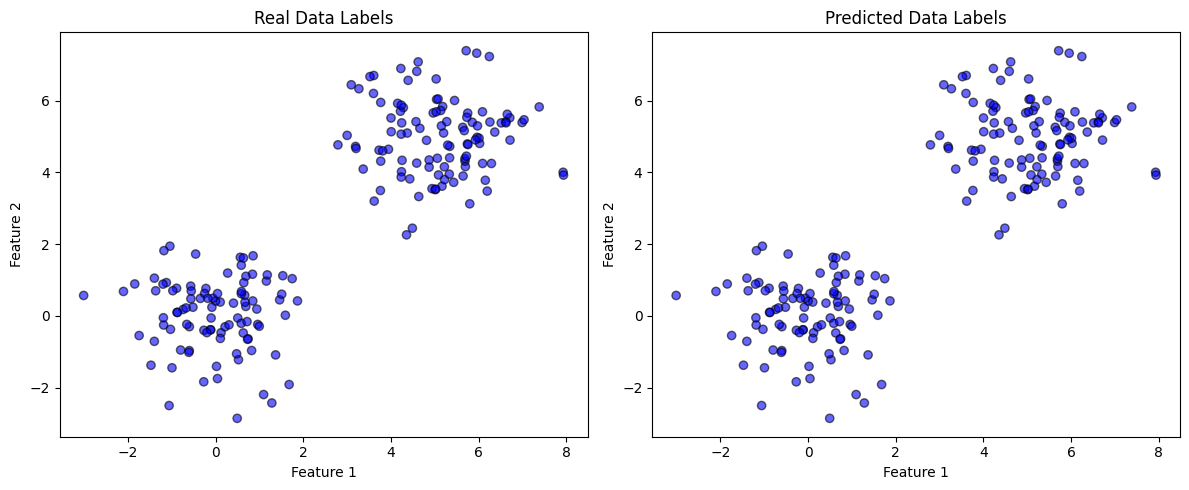

In [30]:
#! plotting the data
import matplotlib.pyplot as plt

#! plot Real Data
plt.figure(figsize=(12, 5))

#! real Data Plot
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.flatten(), cmap='bwr', alpha=0.6, edgecolor='k')
plt.title("Real Data Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

#! predicted Data Plot
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_class.flatten(), cmap='bwr', alpha=0.6, edgecolor='k')
plt.title("Predicted Data Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

I chose a simple feedforward neural network architecture with one hidden layer for this binary classification task. Given the dataset's low dimensionality and linearly separable nature, a shallow neural network with minimal complexity can effectively capture the decision boundary between the two classes. Using a hidden layer with eight neurons and ReLU activation introduces non-linearity, enhancing the model's ability to learn distinct patterns in the data without overfitting. This simplicity makes the model computationally efficient while still capable of learning the data's structure.

The chosen architecture suits the dataset and task well because it balances model capacity and interpretability. The ReLU activation in the hidden layer allows the model to better differentiate between classes, while the sigmoid activation in the output layer provides probabilistic outputs suited for binary classification. This setup is ideal for the synthetic dataset’s characteristics, providing robust classification with minimal layers and parameters, which is sufficient for this straightforward task.